<a href="https://colab.research.google.com/github/Rud896/20news-streamlit-app/blob/main/text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
from sklearn.datasets import fetch_20newsgroups
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re
import pandas as pd
import numpy as np
# Fetch data
newsgroups = fetch_20newsgroups(subset='all')

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [ ]:
# Understanding the structure of the data
print("\n\nData Structure\n-------------")
print(f'Type of data: {type(newsgroups.data)}')
print(f'Type of target: {type(newsgroups.target)}')



Data Structure
-------------
Type of data: <class 'list'>
Type of target: <class 'numpy.ndarray'>


In [ ]:
print("\n\nData Exploration\n----------------")
print(f'Number of datapoints: {len(newsgroups.data)}')
print(f'Number of target variables: {len(newsgroups.target)}')
print(f'Possible classes: {newsgroups.target_names}')



Data Exploration
----------------
Number of datapoints: 18846
Number of target variables: 18846
Possible classes: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [ ]:
print("\n\nSample datapoint\n----------------")
print(f'\nArticle:\n-------\n{newsgroups.data[1]}')
print(f'\nCorresponding Topic:\n------------------\n{newsgroups.target_names[newsgroups.target[1]]}')



Sample datapoint
----------------

Article:
-------
From: mblawson@midway.ecn.uoknor.edu (Matthew B Lawson)
Subject: Which high-performance VLB video card?
Summary: Seek recommendations for VLB video card
Nntp-Posting-Host: midway.ecn.uoknor.edu
Organization: Engineering Computer Network, University of Oklahoma, Norman, OK, USA
Keywords: orchid, stealth, vlb
Lines: 21

  My brother is in the market for a high-performance video card that supports
VESA local bus with 1-2MB RAM.  Does anyone have suggestions/ideas on:

  - Diamond Stealth Pro Local Bus

  - Orchid Farenheit 1280

  - ATI Graphics Ultra Pro

  - Any other high-performance VLB card


Please post or email.  Thank you!

  - Matt

-- 
    |  Matthew B. Lawson <------------> (mblawson@essex.ecn.uoknor.edu)  |   
  --+-- "Now I, Nebuchadnezzar, praise and exalt and glorify the King  --+-- 
    |   of heaven, because everything he does is right and all his ways  |   
    |   are just." - Nebuchadnezzar, king of Babylon, 562 B.C

In [ ]:
sample=newsgroups['data'][:500]

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stemmer=PorterStemmer()
stop_words=set(stopwords.words('english'))

In [ ]:
def processing(text):
  text = text.lower()  # Convert text to lower case
  text = re.sub(r'\S*@\S*\s?', '', text)  # Remove email addresses
  text = re.sub(r'http\S+', '', text)  # Remove URLs
  text = re.sub(r'\W', ' ', text)  # Remove punctuation and special characters
  text = re.sub(r'\d', ' ', text)  # Remove digits
  text = re.sub(r'\s\s+', ' ', text)  # Remove extra spaces
  text_token=word_tokenize(text)
  text2=[stemmer.stem(word) for word in text_token if not word in stop_words]
  return " ".join(text2)

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
print(type(sample[0]))

<class 'str'>


In [ ]:
print(f'{processing(sample[0])}')

mamatha devineni ratnam subject pen fan reaction organ post offic carnegi mellon pittsburgh pa line nntp post host po andrew cmu edu sure basher pen fan pretti confus lack kind post recent pen massacr devil actual bit puzzl bit reliev howev go put end non pittsburgh relief bit prais pen man kill devil wors thought jagr show much better regular season stat also lot fo fun watch playoff bowman let jagr lot fun next coupl game sinc pen go beat pulp jersey anyway disappoint see island lose final regular season game pen rule


In [ ]:
newsgroups['data'][:2]

["From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>\nSubject: Pens fans reactions\nOrganization: Post Office, Carnegie Mellon, Pittsburgh, PA\nLines: 12\nNNTP-Posting-Host: po4.andrew.cmu.edu\n\n\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n",
 'From: mblawson@midway.ecn.uoknor.edu (Matthew B Lawson)\nSubject: Which h

In [ ]:
nlpdf=pd.DataFrame(newsgroups,columns=['data','target'])

In [ ]:
nlpdf.head()

,data,target
0,From: Mamatha Devineni Ratnam <mr47+@andrew.cm...,10
1,From: mblawson@midway.ecn.uoknor.edu (Matthew ...,3
2,From: hilmi-er@dsv.su.se (Hilmi Eren)\nSubject...,17
3,From: guyd@austin.ibm.com (Guy Dawson)\nSubjec...,3
4,From: Alexander Samuel McDiarmid <am2o+@andrew...,4


In [ ]:
print(np.min(nlpdf['target'].unique()))
nlpdf['target'].unique().shape


0


(20,)

In [ ]:
nlpdf=nlpdf
nlpdf['data']=nlpdf['data'].apply(lambda x:processing(x))

In [ ]:
nlpdf['data'][:2]
X=nlpdf['data']
y=nlpdf['target']
y.unique()

array([10,  3, 17,  4, 12, 19, 11, 13,  0,  8,  7,  5,  1, 14, 16,  6,  9,
       18,  2, 15])

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense,Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
# Tokenize words (preserves order)
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)

lengths = [len(text.split()) for text in newsgroups['data']]
print("Max:", max(lengths))
print("95th percentile:", int(np.percentile(lengths, 95)))
length=int(np.percentile(lengths, 95))

padded_sequences = pad_sequences(sequences, maxlen=length, padding='post')
print(len(tokenizer.word_index))

X_train, X_test, y_train, y_test = train_test_split(padded_sequences,y,test_size=0.1,stratify=y, random_state=42)
X_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
model = Sequential([
    Embedding(input_dim = len(tokenizer.word_index) + 1, output_dim=100, input_length=length),
    Bidirectional(LSTM(64,return_sequences=False,kernel_regularizer=regularizers.l1(1e-4),          # Regularizer for input weights
    recurrent_regularizer=regularizers.l1(1e-4),       # Regularizer for recurrent weights
    bias_regularizer=regularizers.l1(1e-4) ,dropout=0.4)),
    Dropout(0.5),
    Dense(20, activation='linear')
])
loss_fn = SparseCategoricalCrossentropy(from_logits=True)
optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

Max: 11821
95th percentile: 755
76882


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',      # what to monitor: 'val_loss' or 'val_accuracy'
    patience=5,              # stop after 3 epochs with no improvement
    restore_best_weights=True  # go back to the best model after stopping
)

In [ ]:
history=(model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(x_val, y_val),callbacks=[early_stop]))

Epoch 1/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 18s 65ms/step - accuracy: 0.2668 - loss: 2.5929 - val_accuracy: 0.7413 - val_loss: 1.3261
Epoch 2/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 0.7819 - loss: 1.2165 - val_accuracy: 0.8433 - val_loss: 0.9902
Epoch 3/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.8867 - loss: 0.8625 - val_accuracy: 0.8751 - val_loss: 0.9000
Epoch 4/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - accuracy: 0.9169 - loss: 0.7441 - val_accuracy: 0.8651 - val_loss: 0.9070
Epoch 5/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.9335 - loss: 0.6662 - val_accuracy: 0.8651 - val_loss: 1.0218
Epoch 6/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 15s 62ms/step - accuracy: 0.9404 - loss: 0.7251 - val_accuracy: 0.8598 - val_loss: 0.9966
Epoch 7/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.9493 - loss: 0.6489 - val_accuracy: 0.8786 - val_loss: 0.9264
Epoch 8/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.9568 - loss: 0.6076 - 

In [ ]:
y_hat=model.predict(X_test)

59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step


In [ ]:
y_pred=np.argmax(y_hat,axis=1)
y_pred[0]

np.int64(12)

In [ ]:
from sklearn.metrics import accuracy_score

acc=accuracy_score(y_test,y_pred)
acc

0.86684350132626

In [ ]:
train_acc=accuracy_score(y_train,np.argmax(model.predict(X_train),axis=1))

477/477 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step


In [ ]:
train_acc

0.9468029350104822

In [ ]:
from sklearn.metrics import f1_score

# y_true: true labels
# y_pred: predicted class indices from model
f1 = f1_score(y_test, y_pred, average='macro')  # or 'micro', 'weighted'
print("F1 Score:", f1)


F1 Score: 0.8648673965284995


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=3))


              precision    recall  f1-score   support

           0      0.780     0.887     0.830        80
           1      0.808     0.825     0.816        97
           2      0.878     0.798     0.836        99
           3      0.714     0.816     0.762        98
           4      0.857     0.812     0.834        96
           5      0.847     0.838     0.843        99
           6      0.750     0.673     0.710        98
           7      0.863     0.889     0.876        99
           8      0.861     0.930     0.894       100
           9      0.921     0.939     0.930        99
          10      0.960     0.950     0.955       100
          11      0.970     0.970     0.970        99
          12      0.802     0.786     0.794        98
          13      0.937     0.899     0.918        99
          14      0.939     0.939     0.939        99
          15      0.948     0.910     0.929       100
          16      0.907     0.857     0.881        91
          17      0.977    

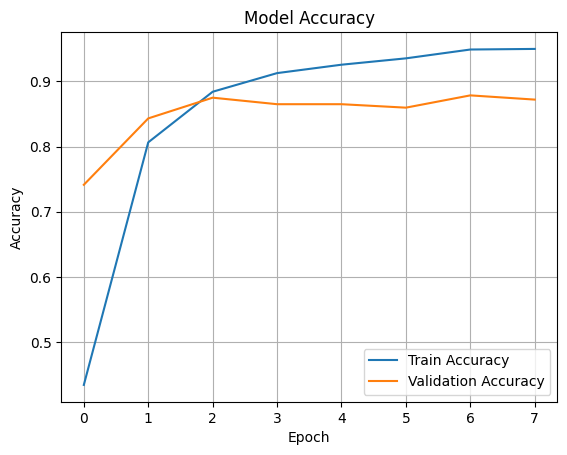

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


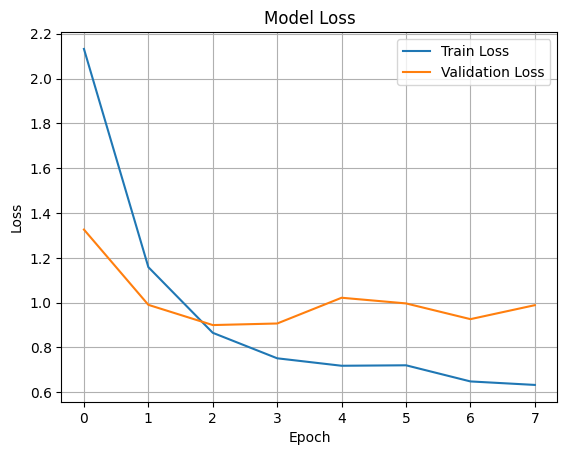

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
plt.savefig("accuracy_curve.png")  # save accuracy curve
plt.clf()
plt.savefig("loss_curve.png")      # save loss curve


<Figure size 640x480 with 0 Axes>

In [ ]:
model.save('newsgroup_model.h5')


In [ ]:
import pickle

# Save model
model.save("newsgroup_model.h5")

# Save tokenizer
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)


In [ ]:
#py version
import sys
print(sys.version)

3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
